In [1]:
results_dir = "/home/ucsd-train13/cshl_2018/dropseqtools_results_macosko/downsampled_100M/"
bamfile = results_dir+"12_my_clean.sorted.bam"
save_dir = "/home/ucsd-train13/scratch/projects/macosko_downsampled_batch_1/dropseqtools_qc/"
#makes shortcuts to directories we are going to use

In [2]:
import pandas as pd
import numpy as np
import dropseqtools_qc as dq
#attaches packages, and lets you call them with short aliases

In [3]:
cell_bc_counts = dq.get_cell_barcode_counts(bamfile, save_dir+"cell_barcode_counts.pickle")
#

In [6]:
cell_bc_counts

Counter({'AAAAAAGAACTA': 1,
         'TGGGCAAATTAC': 1791,
         'TCTCCAATCTTC': 181,
         'CCGTACTATAGC': 3742,
         'AAAAAAAAAAAA': 39387,
         'AAGATGACGGTT': 44,
         'TGAGAGATCTTG': 6280,
         'GCTGCGGACAGT': 2,
         'GATGGCTAGATC': 5651,
         'GTTGTCTACTTT': 5239,
         'AACTAAATCATA': 1347,
         'CAGTCGCAATGC': 9735,
         'GTGGGAGGCACG': 204,
         'CGAGGATTAACC': 5290,
         'CCGAGCTTAGCA': 22,
         'GAATGTTGAAAG': 1765,
         'TAGAGGGGAAGG': 71,
         'CTCTGTCGTAAA': 14668,
         'TTAGAGTCACCT': 296,
         'AGAGGGAAGTAC': 9,
         'TTTACTTGCGCC': 1989,
         'CCAATCGCAAAG': 4939,
         'ACACTTACATAT': 4303,
         'CAGCTTAATTTG': 627,
         'ATCGACCTGATA': 205,
         'CATTAGAAACAC': 6273,
         'CGCTGACCTTGA': 108,
         'TCGACTTCTTCT': 27421,
         'TTAGAGAACTAG': 273,
         'CATAGAGACCGC': 1280,
         'TAAATGCCAACT': 12,
         'ATCAATATTCTC': 5771,
         'TCTTAATCTGCA': 99,


In [7]:
cell_bc_counts ['ATGTAAAATCTT']

437

In [9]:
len(cell_bc_counts)

1932092

In [10]:
cell_barcodes_to_analyze = dq.get_cell_barcodes_to_analyze(cell_bc_counts)

In [11]:
len(cell_barcodes_to_analyze)

19320

In [13]:
type(cell_barcodes_to_analyze)

list

In [14]:
umi_counts = dq.make_df_for_kneeplot(bamfile,
                                     cell_barcodes_to_analyze,
                                     save_dir+"barcodes_genes_umi.pickle")

In [16]:
type(umi_counts)

pandas.core.frame.DataFrame

In [20]:
umi_counts.head(5)

,umi_count,percent_of_total,cumulative
cell_barcode,,,
GGCCGCAGTCCG,33405,0.002554,0.002554
CTTGTGCGGGAA,33146,0.002535,0.005089
GCGCAACTGCTC,24677,0.001887,0.006976
GATTGGGAGGCA,20416,0.001561,0.008537
AGTCAAGCCCTC,20152,0.001541,0.010078


In [34]:
total_umi_count = umi_counts['umi_count'].sum()
total_umi_count

13077554

In [33]:
umi_counts['cumulative'].head()

cell_barcode
GGCCGCAGTCCG    0.002554
CTTGTGCGGGAA    0.005089
GCGCAACTGCTC    0.006976
GATTGGGAGGCA    0.008537
AGTCAAGCCCTC    0.010078
Name: cumulative, dtype: float64

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
len(umi_counts['cumulative'].values)

19320

Text(0.5,1,'Knee plot of cumulative sums of UMIs')

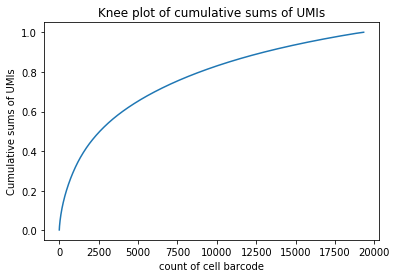

In [41]:
plt.plot(umi_counts['cumulative'].values)
plt.xlabel("count of cell barcode")
plt.ylabel("Cumulative sums of UMIs")
plt.title("Knee plot of cumulative sums of UMIs")

Based on the kneeplot, we are going to choose the cells to include in the analysis

In [43]:
num_cells = 2500

In [51]:
cell_barcodes_to_keep = pd.DataFrame(index = umi_counts.head(num_cells).index)
cell_barcodes_to_keep.to_csv(save_dir+"cell_barcodes_to_keep.csv")